In [675]:
# import our needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
import re


In [676]:
# read our dataset into a dataframe
df=pd.read_csv('Fortune_1000.csv')
df.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468


In [677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [678]:
df.shape

(1000, 18)

In [679]:
df.drop(['CEO'],axis=1,inplace=True)

In [680]:
df.isnull().sum()

company               0
rank                  0
rank_change           0
revenue               0
profit                3
num. of employees     1
sector                0
city                  0
state                 0
newcomer              0
ceo_founder           0
ceo_woman             0
profitable            0
prev_rank             0
Website               0
Ticker               49
Market Cap           31
dtype: int64

In [681]:
len(df['Ticker'].unique()) # not important

952

In [682]:
df.drop('Ticker',axis=1,inplace=True)
df.drop('Website',axis=1,inplace=True)

In [683]:
df.isnull().sum()

company               0
rank                  0
rank_change           0
revenue               0
profit                3
num. of employees     1
sector                0
city                  0
state                 0
newcomer              0
ceo_founder           0
ceo_woman             0
profitable            0
prev_rank             0
Market Cap           31
dtype: int64

In [684]:
cat_lst=['sector','ceo_founder','ceo_woman','profitable','newcomer','city','state']

In [685]:
for col in cat_lst:
    df[col]=df[col].apply(lambda x: x.lower().strip())

In [686]:
df.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,retailing,bentonville,ar,no,no,no,yes,1.0,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,retailing,seattle,wa,no,no,no,yes,2.0,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,technology,cupertino,ca,no,no,no,yes,3.0,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,health care,woonsocket,ri,no,no,yes,yes,4.0,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,health care,minnetonka,mn,no,no,no,yes,5.0,500468


In [687]:
df['sector'].value_counts()

sector
financials                       166
technology                       121
energy                           100
retailing                         77
health care                       77
business services                 52
industrials                       50
materials                         46
transportation                    35
food, beverages & tobacco         34
engineering & construction        32
wholesalers                       31
chemicals                         29
media                             28
hotels, restaurants & leisure     28
household products                23
motor vehicles & parts            20
aerospace & defense               17
apparel                           16
food & drug stores                 9
telecommunications                 9
Name: count, dtype: int64

In [688]:
df['state'].unique()

array(['ar', 'wa', 'ca', 'ri', 'mn', 'tx', 'ne', 'pa', 'ct', 'oh', 'ga',
       'il', 'in', 'mi', 'ny', 'mo', 'dc', 'nc', 'nj', 'tn', 'ky', 'ma',
       'id', 'md', 'va', 'fl', 'or', 'wi', 'co', 'az', 'la', 'de', 'ok',
       'ia', 'nv', 'ks', 'al', 'nd', 'sc', 'ms', 'me', 'hi', 'nh', 'vt',
       'ut', 'pr'], dtype=object)

In [689]:
df['city'].unique()

array(['bentonville', 'seattle', 'cupertino', 'woonsocket', 'minnetonka',
       'irving', 'omaha', 'mountain view', 'conshohocken', 'issaquah',
       'bloomfield', 'dallas', 'redmond', 'dublin', 'san ramon',
       'atlanta', 'deerfield', 'findlay', 'indianapolis', 'cincinnati',
       'dearborn', 'new york', 'detroit', 'st. louis', 'menlo park',
       'philadelphia', 'houston', 'san antonio', 'round rock',
       'minneapolis', 'washington', 'mooresville', 'charlotte',
       'new brunswick', 'chicago', 'memphis', 'louisville',
       'san francisco', 'bloomington', 'purchase', 'santa clara',
       'boston', 'armonk', 'newark', 'boise', 'burbank', 'bethesda',
       'mclean', 'waltham', 'palo alto', 'nashville', 'north chicago',
       'midland', 'austin', 'northbrook', 'richfield', 'stamford',
       'kenilworth', 'san jose', 'framingham', 'lakeland',
       'mayfield village', 'columbus', 'springdale', 'beaverton',
       'moline', 'abbott park', 'reston', 'inver grove heights',

In [690]:
col_to_cat=['sector','ceo_founder','ceo_woman','profitable','newcomer','city','state']

for col in col_to_cat:
    df[col]=df[col].astype('category')

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1000 non-null   object  
 1   rank               1000 non-null   int64   
 2   rank_change        1000 non-null   float64 
 3   revenue            1000 non-null   float64 
 4   profit             997 non-null    float64 
 5   num. of employees  999 non-null    float64 
 6   sector             1000 non-null   category
 7   city               1000 non-null   category
 8   state              1000 non-null   category
 9   newcomer           1000 non-null   category
 10  ceo_founder        1000 non-null   category
 11  ceo_woman          1000 non-null   category
 12  profitable         1000 non-null   category
 13  prev_rank          1000 non-null   object  
 14  Market Cap         969 non-null    object  
dtypes: category(7), float64(4), int64(1), object(3)
memory u

In [692]:
''' import to see'''

# pattern = f"[{re.escape(punctuation)}]"
# pattern

' import to see'

## count special characters that may appear in cat_numeric_column

In [693]:
def count_char(df,col,char):
    return df[col].str.count(char).value_counts()

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1000 non-null   object  
 1   rank               1000 non-null   int64   
 2   rank_change        1000 non-null   float64 
 3   revenue            1000 non-null   float64 
 4   profit             997 non-null    float64 
 5   num. of employees  999 non-null    float64 
 6   sector             1000 non-null   category
 7   city               1000 non-null   category
 8   state              1000 non-null   category
 9   newcomer           1000 non-null   category
 10  ceo_founder        1000 non-null   category
 11  ceo_woman          1000 non-null   category
 12  profitable         1000 non-null   category
 13  prev_rank          1000 non-null   object  
 14  Market Cap         969 non-null    object  
dtypes: category(7), float64(4), int64(1), object(3)
memory u

In [695]:
miss_captured_colms=['Market Cap','prev_rank']

In [696]:

for char in ['-',',','_',';',':']:
    print(f'for char [{char}]: ')
    print(count_char(df,'Market Cap',char))
    print('---------------')

for char [-]: 
Market Cap
0.0    961
1.0      8
Name: count, dtype: int64
---------------
for char [,]: 
Market Cap
0.0    969
Name: count, dtype: int64
---------------
for char [_]: 
Market Cap
0.0    969
Name: count, dtype: int64
---------------
for char [;]: 
Market Cap
0.0    969
Name: count, dtype: int64
---------------
for char [:]: 
Market Cap
0.0    969
Name: count, dtype: int64
---------------


In [697]:
df['Market Cap'].apply(lambda x: ''.join(re.findall(r'[^\d.]',str(x).strip()))).value_counts()

Market Cap
       961
nan     31
-        8
Name: count, dtype: int64

In [698]:
market_non_df=df[df['Market Cap'].isnull()].copy()


In [699]:
market_non_df.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,Market Cap
41,State Farm Insurance,42,-3.0,82224.7,1280.9,53586.0,financials,bloomington,il,no,no,no,yes,39.0,NaN
77,Liberty Mutual Insurance Group,78,-7.0,48200.0,3068.0,45000.0,financials,boston,ma,no,no,no,yes,71.0,NaN
79,Nationwide,80,-4.0,47376.0,1617.2,24134.0,financials,columbus,oh,no,no,no,yes,76.0,NaN
94,CHS,95,8.0,38448.0,554.0,9941.0,"food, beverages & tobacco",inver grove heights,mn,no,no,no,yes,103.0,NaN
231,Land O'Lakes,232,-13.0,15916.4,287.4,9000.0,"food, beverages & tobacco",arden hills,mn,no,no,yes,yes,219.0,NaN


In [700]:
market_non_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,31.0,496.548387,286.305296,42.0,265.00,418.0,731.0,948.0
rank_change,31.0,-5.741935,18.964823,-70.0,-7.50,0.0,0.0,37.0
revenue,31.0,13483.935484,17545.506700,2346.5,3660.25,8274.6,13995.5,82224.7
profit,31.0,707.383871,835.542603,-366.8,197.25,419.2,927.5,3068.0
num. of employees,30.0,9496.700000,12572.402443,749.0,3158.00,4830.0,9112.5,53586.0


In [701]:
counts=market_non_df['sector'].value_counts()
counts

sector
financials                       25
food, beverages & tobacco         2
energy                            1
engineering & construction        1
retailing                         1
media                             1
aerospace & defense               0
materials                         0
transportation                    0
telecommunications                0
technology                        0
motor vehicles & parts            0
hotels, restaurants & leisure     0
industrials                       0
household products                0
apparel                           0
health care                       0
food & drug stores                0
chemicals                         0
business services                 0
wholesalers                       0
Name: count, dtype: int64

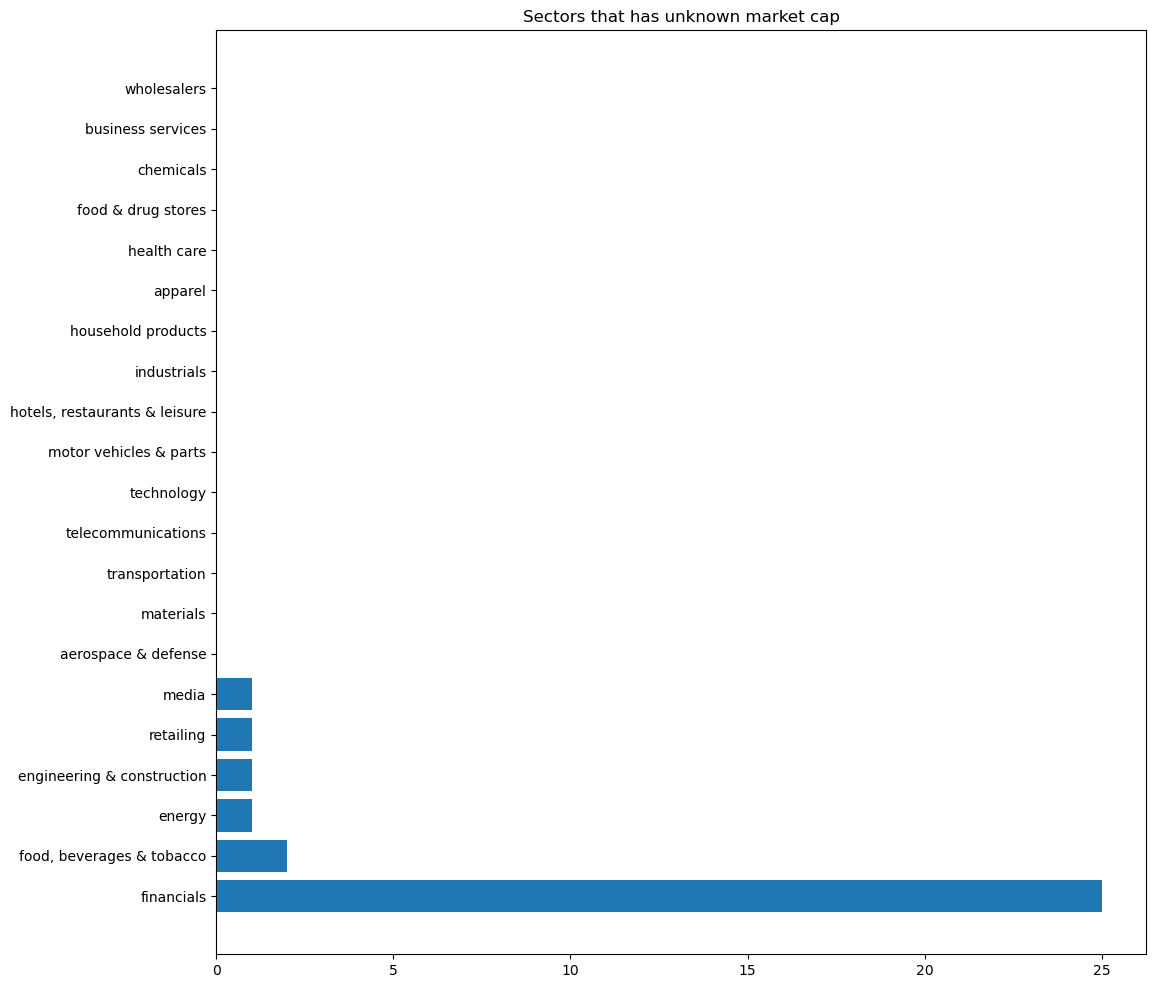

In [702]:
plt.figure(figsize=(12,12))
plt.barh(y=counts.index,width=counts.values)
plt.title('Sectors that has unknown market cap')
plt.show()

In [703]:
cat_sectors_needfill=list(counts.index)
cat_sectors_needfill=cat_sectors_needfill[0:6]

In [704]:
cat_sectors_needfill

['financials',
 'food, beverages & tobacco',
 'energy',
 'engineering & construction',
 'retailing',
 'media']

In [705]:
market_non_df['state'].value_counts().head(6)

state
mn    5
oh    4
wi    3
ny    3
ri    2
pa    2
Name: count, dtype: int64

In [706]:
market_non_df['profitable'].value_counts()

profitable
yes    28
no      3
Name: count, dtype: int64

In [707]:
market_non_df['ceo_founder'].value_counts()

ceo_founder
no     31
yes     0
Name: count, dtype: int64

In [708]:
df['prev_rank'].apply(lambda x: ''.join(re.findall(r'[^\d.]',str(x).strip()))).value_counts()

prev_rank
    1000
Name: count, dtype: int64

In [709]:
def standby_col_to_num(x):
    x=str(x)
    x=re.sub(r'[^\d.]','',x)
    x=x.strip()
    if x!='':
        return x
    else:
        return np.nan

In [710]:
backup_df=df.copy()

In [711]:
df['Market Cap']=df['Market Cap'].apply(standby_col_to_num)

In [712]:
df['Market Cap'].isnull().sum() # 31 + 8

39

In [713]:
df['Market Cap']=df['Market Cap'].astype(float)

In [714]:
df['Market Cap'].head()

0     352037.0
1    1202717.0
2    2443962.0
3     125204.0
4     500468.0
Name: Market Cap, dtype: float64

In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1000 non-null   object  
 1   rank               1000 non-null   int64   
 2   rank_change        1000 non-null   float64 
 3   revenue            1000 non-null   float64 
 4   profit             997 non-null    float64 
 5   num. of employees  999 non-null    float64 
 6   sector             1000 non-null   category
 7   city               1000 non-null   category
 8   state              1000 non-null   category
 9   newcomer           1000 non-null   category
 10  ceo_founder        1000 non-null   category
 11  ceo_woman          1000 non-null   category
 12  profitable         1000 non-null   category
 13  prev_rank          1000 non-null   object  
 14  Market Cap         961 non-null    float64 
dtypes: category(7), float64(5), int64(1), object(2)
memory u

In [716]:
tst=df['prev_rank'].copy()

In [717]:
tst=tst.apply(standby_col_to_num)

In [718]:
tst.isnull().sum()

531

In [719]:
tst=tst.astype(float)

In [720]:
tst.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: prev_rank, dtype: float64

In [721]:
df[df['prev_rank']==' '].shape[0]

531

In [722]:
df['prev_rank']=tst.copy()

In [723]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1000 non-null   object  
 1   rank               1000 non-null   int64   
 2   rank_change        1000 non-null   float64 
 3   revenue            1000 non-null   float64 
 4   profit             997 non-null    float64 
 5   num. of employees  999 non-null    float64 
 6   sector             1000 non-null   category
 7   city               1000 non-null   category
 8   state              1000 non-null   category
 9   newcomer           1000 non-null   category
 10  ceo_founder        1000 non-null   category
 11  ceo_woman          1000 non-null   category
 12  profitable         1000 non-null   category
 13  prev_rank          469 non-null    float64 
 14  Market Cap         961 non-null    float64 
dtypes: category(7), float64(6), int64(1), object(1)
memory u

In [724]:
df.isnull().sum()

company                0
rank                   0
rank_change            0
revenue                0
profit                 3
num. of employees      1
sector                 0
city                   0
state                  0
newcomer               0
ceo_founder            0
ceo_woman              0
profitable             0
prev_rank            531
Market Cap            39
dtype: int64

In [725]:
df.drop('prev_rank',axis=1,inplace=True)

In [726]:
df['company']=df['company'].apply(lambda x: x.lower().strip())
df.duplicated(subset='company').sum()

0

In [727]:
df.duplicated().sum()

0

In [728]:
df.drop('company',axis=1,inplace=True)

In [729]:
grouped_sectors_for_marketCap=df.groupby('sector')['Market Cap'].median()
grouped_sectors_for_marketCap

C:\Users\kiril\AppData\Local\Temp\ipykernel_21216\3100673381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_sectors_for_marketCap=df.groupby('sector')['Market Cap'].median()


sector
aerospace & defense              16090.60
apparel                           5790.20
business services                10118.40
chemicals                        14450.10
energy                           16182.80
engineering & construction        3301.60
financials                       19135.70
food & drug stores                3347.40
food, beverages & tobacco        24989.70
health care                      24625.80
hotels, restaurants & leisure     9002.10
household products                8081.80
industrials                       9980.85
materials                         5601.70
media                            12733.40
motor vehicles & parts            3433.35
retailing                         6595.20
technology                       21547.50
telecommunications               16743.10
transportation                    7314.30
wholesalers                       5109.05
Name: Market Cap, dtype: float64

In [730]:
df_nan_market=df[df['Market Cap'].isnull()]
df_exist_market=df[~(df['Market Cap'].isnull())]

In [731]:
df_nan_market.iloc[0]


rank                          42
rank_change                 -3.0
revenue                  82224.7
profit                    1280.9
num. of employees        53586.0
sector                financials
city                 bloomington
state                         il
newcomer                      no
ceo_founder                   no
ceo_woman                     no
profitable                   yes
Market Cap                   NaN
Name: 41, dtype: object

In [732]:
for row in range(df_nan_market.shape[0]):
    df_nan_market.iloc[row,12]=grouped_sectors_for_marketCap[df_nan_market.iloc[row]['sector']]

In [733]:
df_nan_market.head()

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
41,42,-3.0,82224.7,1280.9,53586.0,financials,bloomington,il,no,no,no,yes,19135.7
71,72,-5.0,51198.5,277.1,14344.0,financials,new york,ny,no,no,no,yes,19135.7
75,76,-7.0,48393.9,4412.2,232000.0,food & drug stores,lakeland,fl,no,no,no,yes,3347.4
77,78,-7.0,48200.0,3068.0,45000.0,financials,boston,ma,no,no,no,yes,19135.7
79,80,-4.0,47376.0,1617.2,24134.0,financials,columbus,oh,no,no,no,yes,19135.7


In [734]:
new_df=pd.concat([df_exist_market,df_nan_market],axis=0)
new_df.head()

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
0,1,0.0,572754.0,13673.0,2300000.0,retailing,bentonville,ar,no,no,no,yes,352037.0
1,2,0.0,469822.0,33364.0,1608000.0,retailing,seattle,wa,no,no,no,yes,1202717.0
2,3,0.0,365817.0,94680.0,154000.0,technology,cupertino,ca,no,no,no,yes,2443962.0
3,4,0.0,292111.0,7910.0,258000.0,health care,woonsocket,ri,no,no,yes,yes,125204.0
4,5,0.0,287597.0,17285.0,350000.0,health care,minnetonka,mn,no,no,no,yes,500468.0


In [735]:
new_df.shape

(1000, 13)

In [736]:
new_df.isnull().sum()

rank                 0
rank_change          0
revenue              0
profit               3
num. of employees    1
sector               0
city                 0
state                0
newcomer             0
ceo_founder          0
ceo_woman            0
profitable           0
Market Cap           0
dtype: int64

In [737]:
new_df.dropna(inplace=True)

In [738]:
new_df.isnull().sum()

rank                 0
rank_change          0
revenue              0
profit               0
num. of employees    0
sector               0
city                 0
state                0
newcomer             0
ceo_founder          0
ceo_woman            0
profitable           0
Market Cap           0
dtype: int64

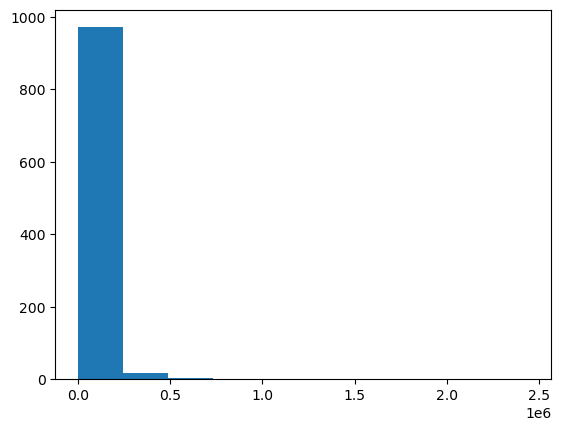

In [739]:
plt.hist(new_df['Market Cap'])
plt.show()

<Axes: xlabel='Market Cap'>

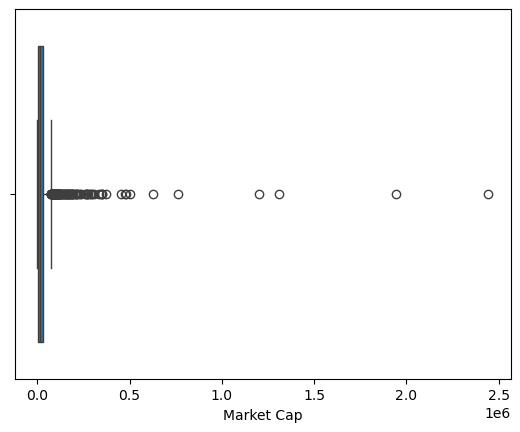

In [740]:
sns.boxplot(x=new_df['Market Cap'])

In [741]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 947
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rank               996 non-null    int64   
 1   rank_change        996 non-null    float64 
 2   revenue            996 non-null    float64 
 3   profit             996 non-null    float64 
 4   num. of employees  996 non-null    float64 
 5   sector             996 non-null    category
 6   city               996 non-null    category
 7   state              996 non-null    category
 8   newcomer           996 non-null    category
 9   ceo_founder        996 non-null    category
 10  ceo_woman          996 non-null    category
 11  profitable         996 non-null    category
 12  Market Cap         996 non-null    float64 
dtypes: category(7), float64(5), int64(1)
memory usage: 84.1 KB


In [742]:
new_df['sector'].value_counts()

sector
financials                       166
technology                       121
energy                            99
health care                       77
retailing                         77
business services                 52
industrials                       50
materials                         46
transportation                    35
food, beverages & tobacco         34
engineering & construction        32
wholesalers                       31
chemicals                         29
hotels, restaurants & leisure     28
media                             27
household products                23
motor vehicles & parts            19
aerospace & defense               17
apparel                           16
food & drug stores                 9
telecommunications                 8
Name: count, dtype: int64

In [743]:
general_sectors = {
    'retailing': 'consumer',
    'food & drug stores': 'consumer',
    'food, beverages & tobacco': 'consumer',
    'apparel': 'consumer',
    'household products': 'consumer',

    'technology': 'technology',
    'telecommunications': 'technology',
    'media': 'technology',

    'health care': 'healthcare',

    'energy': 'energy',

    'financials': 'financials',

    'motor vehicles & parts': 'industrials',
    'transportation': 'industrials',
    'industrials': 'industrials',
    'engineering & construction': 'industrials',
    'aerospace & defense': 'industrials',

    'chemicals': 'materials',
    'materials': 'materials',
    'wholesalers': 'materials',

    'business services': 'services',
    'hotels, restaurants & leisure': 'services'
}

In [744]:
new_df['general sector']=new_df['sector'].map(general_sectors)

In [745]:
new_df.head()

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap,general sector
0,1,0.0,572754.0,13673.0,2300000.0,retailing,bentonville,ar,no,no,no,yes,352037.0,consumer
1,2,0.0,469822.0,33364.0,1608000.0,retailing,seattle,wa,no,no,no,yes,1202717.0,consumer
2,3,0.0,365817.0,94680.0,154000.0,technology,cupertino,ca,no,no,no,yes,2443962.0,technology
3,4,0.0,292111.0,7910.0,258000.0,health care,woonsocket,ri,no,no,yes,yes,125204.0,healthcare
4,5,0.0,287597.0,17285.0,350000.0,health care,minnetonka,mn,no,no,no,yes,500468.0,healthcare


In [746]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 947
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rank               996 non-null    int64   
 1   rank_change        996 non-null    float64 
 2   revenue            996 non-null    float64 
 3   profit             996 non-null    float64 
 4   num. of employees  996 non-null    float64 
 5   sector             996 non-null    category
 6   city               996 non-null    category
 7   state              996 non-null    category
 8   newcomer           996 non-null    category
 9   ceo_founder        996 non-null    category
 10  ceo_woman          996 non-null    category
 11  profitable         996 non-null    category
 12  Market Cap         996 non-null    float64 
 13  general sector     996 non-null    object  
dtypes: category(7), float64(5), int64(1), object(1)
memory usage: 91.9+ KB


In [747]:
new_df['general sector']=new_df['general sector'].astype('category')

In [748]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 947
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rank               996 non-null    int64   
 1   rank_change        996 non-null    float64 
 2   revenue            996 non-null    float64 
 3   profit             996 non-null    float64 
 4   num. of employees  996 non-null    float64 
 5   sector             996 non-null    category
 6   city               996 non-null    category
 7   state              996 non-null    category
 8   newcomer           996 non-null    category
 9   ceo_founder        996 non-null    category
 10  ceo_woman          996 non-null    category
 11  profitable         996 non-null    category
 12  Market Cap         996 non-null    float64 
 13  general sector     996 non-null    category
dtypes: category(8), float64(5), int64(1)
memory usage: 85.5 KB


In [749]:
# def alt_handel_outliers(df, columns):
#     extrem_outlier_counts={}
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         # Define boundaries
#         lower_small = Q1 - 1.5 * IQR
#         upper_small = Q3 + 1.5 * IQR
        
#         del_outliers=df[(df[col]<lower_small) | (df[col]>upper_small)].copy()
        
#         extrem_outlier_counts[col]=del_outliers.shape[0]
#         # 1. Remove rows with far outliers
#         df = df[(df[col] >= lower_small) & (df[col] <= upper_small)]

#     return df,extrem_outlier_counts


In [750]:
def handel_outliers(df, columns):
    extrem_outlier_counts={}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define boundaries
        lower_small = Q1 - 1.5 * IQR
        upper_small = Q3 + 1.5 * IQR
        
        lower_far = Q1 - 4 * IQR
        upper_far = Q3 + 4 * IQR

        del_outliers=df[(df[col]<lower_far) | (df[col]>upper_far)].copy()
        
        extrem_outlier_counts[col]=del_outliers.shape[0]
        
        # 1. Remove rows with far outliers
        df = df[(df[col] >= lower_far) & (df[col] <= upper_far)]
        
        # # 2. Cap small outliers (between 1.5*IQR and 3*IQR)
        # df[col] = df[col].apply(lambda x: lower_small if x < lower_small else x)
        # df[col] = df[col].apply(lambda x: upper_small if x > upper_small else x)

    return df,extrem_outlier_counts


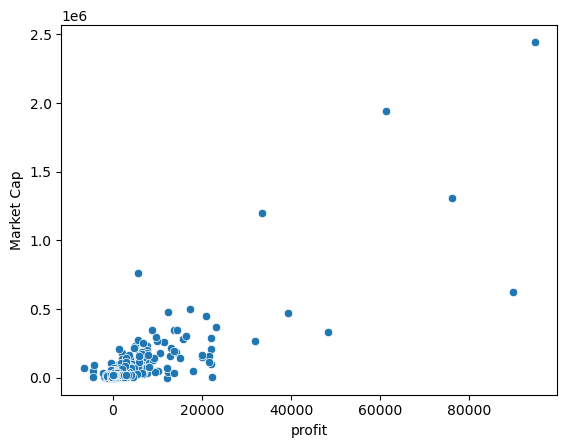

In [751]:
sns.scatterplot(x='profit',y='Market Cap',data=new_df)
plt.show()

In [752]:
imp_columns=['Market Cap','revenue','num. of employees','profit']
tst_df,extrem_outliers_count=handel_outliers(new_df,imp_columns)

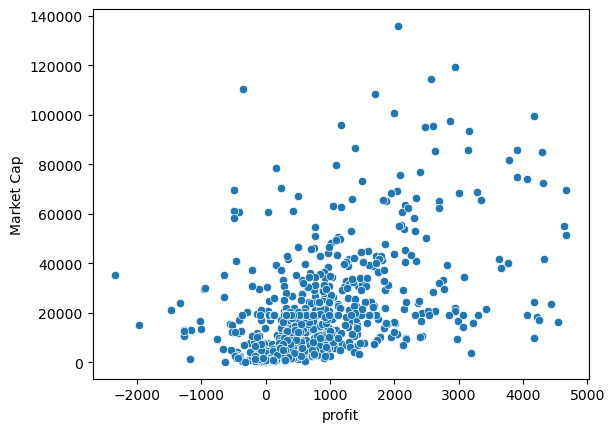

In [753]:
sns.scatterplot(x='profit',y='Market Cap',data=tst_df)
plt.show()

In [754]:
tst_df.shape

(851, 14)

In [755]:
extrem_outliers_count

{'Market Cap': 50, 'revenue': 43, 'num. of employees': 27, 'profit': 25}

In [756]:
tst_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,851.0,565.556992,255.541464,78.0,349.50,572.0,785.50,1000.0
rank_change,851.0,-0.952996,31.286120,-178.0,0.00,0.0,0.00,200.0
revenue,851.0,8124.500705,7235.657839,2107.2,3301.25,5336.3,10399.50,48200.0
profit,851.0,732.660517,965.959055,-2343.0,156.15,457.4,1007.80,4666.5
num. of employees,851.0,16989.196240,17171.442445,160.0,5886.00,11307.0,21450.00,90000.0
Market Cap,851.0,17092.390423,20152.773521,149.0,3870.15,9539.0,21088.15,135987.6


In [757]:
final_df=tst_df.copy()

In [758]:
df_neg_profi=final_df[final_df['profit']<0].copy()

In [759]:
df_neg_profi.head()

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap,general sector
145,146,54.0,24634.0,-1964.0,84100.0,transportation,chicago,il,no,no,no,no,15049.7,industrials
147,148,-16.0,24043.4,-90.9,50000.0,food & drug stores,camp hill,pa,no,no,yes,no,488.1,consumer
167,168,-8.0,20642.0,-102.0,26000.0,energy,san francisco,ca,no,no,yes,no,29433.7,energy
169,170,-30.0,20502.0,-219.0,54000.0,energy,houston,tx,no,no,no,no,37410.2,energy
203,204,50.0,17886.3,-1269.1,37000.0,health care,canonsburg,pa,no,no,no,no,13160.2,healthcare


In [760]:
df_neg_profi.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,107.0,640.373832,243.400769,146.0,468.5,657.0,854.50,1000.0
rank_change,107.0,-1.869159,36.035644,-115.0,0.0,0.0,0.00,193.0
revenue,107.0,6170.838318,4857.603078,2107.2,2902.5,4405.5,7134.50,24634.0
profit,107.0,-366.427103,424.221566,-2343.0,-472.3,-203.5,-83.25,-1.4
num. of employees,107.0,14258.289720,14633.555425,160.0,4526.5,9800.0,20018.00,84100.0
Market Cap,107.0,12004.483178,16866.463345,149.0,1828.1,6275.3,14462.80,110419.9


In [761]:
counts_neg_profits=df_neg_profi['sector'].value_counts()
counts_neg_profits

sector
energy                           22
technology                       21
retailing                         9
financials                        8
business services                 7
health care                       7
media                             7
materials                         7
hotels, restaurants & leisure     5
transportation                    5
industrials                       2
motor vehicles & parts            1
aerospace & defense               1
household products                1
apparel                           1
food, beverages & tobacco         1
food & drug stores                1
engineering & construction        1
telecommunications                0
chemicals                         0
wholesalers                       0
Name: count, dtype: int64

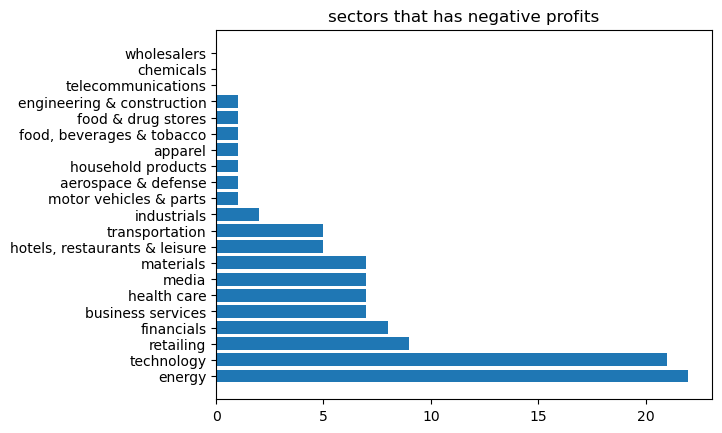

In [762]:
plt.barh(y=counts_neg_profits.index,width=counts_neg_profits.values)
plt.title('sectors that has negative profits')
plt.show()

In [763]:
counts_neg_profit_gen=df_neg_profi['general sector'].value_counts()
counts_neg_profit_gen

general sector
technology     28
energy         22
consumer       13
services       12
industrials    10
financials      8
healthcare      7
materials       7
Name: count, dtype: int64

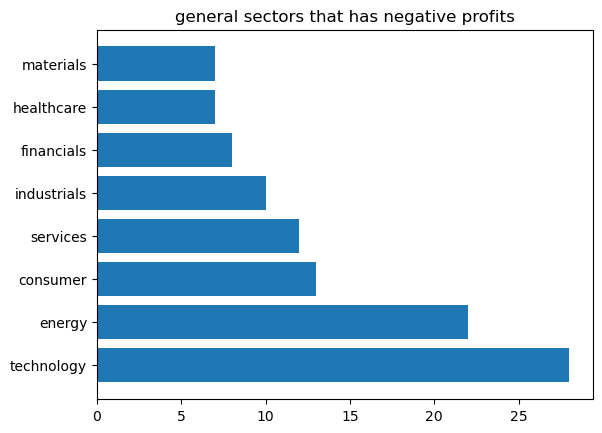

In [764]:
plt.barh(y=counts_neg_profit_gen.index,width=counts_neg_profit_gen.values)
plt.title('general sectors that has negative profits')
plt.show()

In [765]:
df_neg_profi['newcomer'].value_counts()

newcomer
no     102
yes      5
Name: count, dtype: int64

In [766]:
df_neg_profi['ceo_woman'].value_counts()

ceo_woman
no     99
yes     8
Name: count, dtype: int64

In [767]:
df_neg_profi['profitable'].value_counts()

profitable
no     107
yes      0
Name: count, dtype: int64

In [768]:
df_neg_profi['rank'].sort_values().head()

145    146
147    148
167    168
169    170
203    204
Name: rank, dtype: int64

In [769]:
df_pos_profit=df[df['profit']>0].copy()

In [770]:
df_pos_profit['profitable'].value_counts()

profitable
yes    883
no       0
Name: count, dtype: int64

In [771]:
df_pos_profit['rank'].sort_values().head()

0    1
1    2
2    3
3    4
4    5
Name: rank, dtype: int64

In [772]:
final_df['Revenue per Employee']=final_df['revenue']/final_df['num. of employees']

In [773]:
final_df.head()

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap,general sector,Revenue per Employee
78,79,-5.0,47702.0,3350.9,49077.0,financials,mayfield village,oh,no,no,yes,yes,65485.0,financials,0.971983
86,87,-29.0,42534.2,116.3,3242.0,financials,new york,ny,no,no,no,yes,1699.0,financials,13.119741
87,88,39.0,42078.0,60.0,4100.0,energy,houston,tx,no,no,no,yes,2131.0,energy,10.262927
88,89,16.0,40806.9,4637.7,6911.0,energy,houston,tx,no,no,no,yes,55122.0,energy,5.904630
98,99,-7.0,36347.0,1706.0,31518.0,energy,chicago,il,no,no,no,yes,42832.0,energy,1.153214


In [774]:
for col in final_df.columns:
    if final_df[col].dtype=='category':
        final_df[col]=final_df[col].cat.codes

In [775]:
final_df.head()

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap,general sector,Revenue per Employee
78,79,-5.0,47702.0,3350.9,49077.0,6,217,32,0,0,1,1,65485.0,2,0.971983
86,87,-29.0,42534.2,116.3,3242.0,6,259,31,0,0,0,1,1699.0,2,13.119741
87,88,39.0,42078.0,60.0,4100.0,4,164,40,0,0,0,1,2131.0,1,10.262927
88,89,16.0,40806.9,4637.7,6911.0,4,164,40,0,0,0,1,55122.0,1,5.904630
98,99,-7.0,36347.0,1706.0,31518.0,4,69,13,0,0,0,1,42832.0,1,1.153214


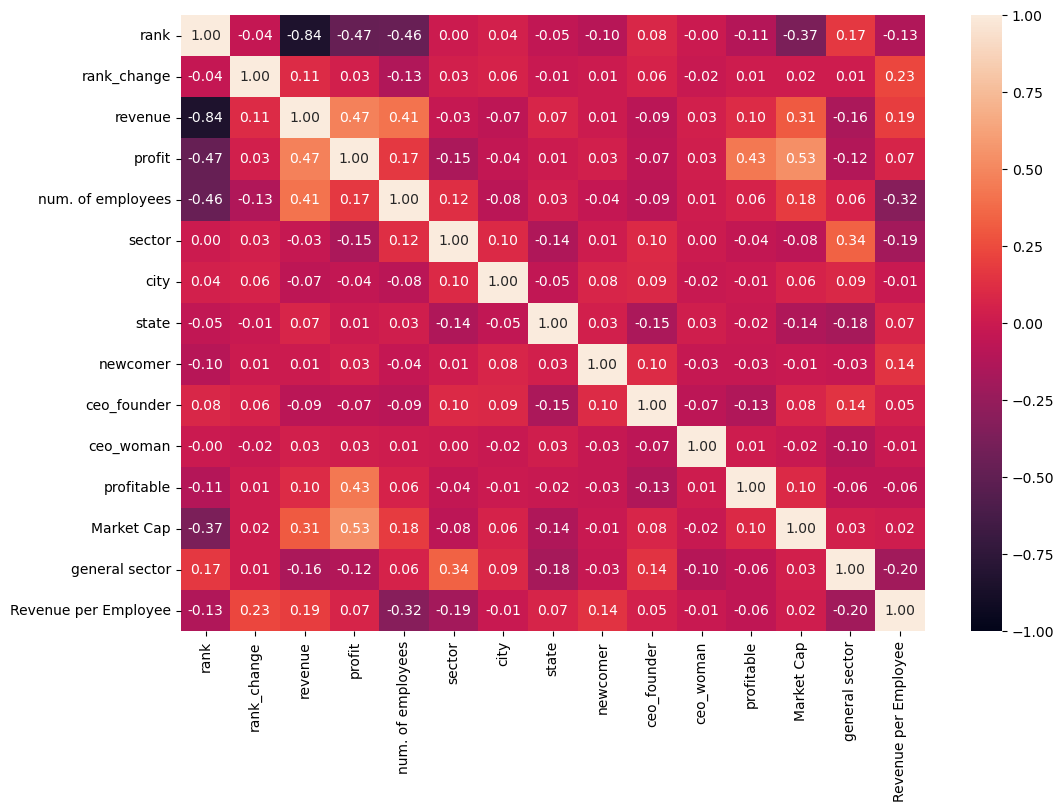

In [776]:
plt.figure(figsize=(12,8))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1)
plt.show()

In [777]:
selected_df=final_df[['Market Cap','profitable','revenue','rank','profit','num. of employees']].copy()

In [778]:
selected_df['profitable'].value_counts()

profitable
1    744
0    107
Name: count, dtype: int64

In [779]:
selected_df.head()

,Market Cap,profitable,revenue,rank,profit,num. of employees
78,65485.0,1,47702.0,79,3350.9,49077.0
86,1699.0,1,42534.2,87,116.3,3242.0
87,2131.0,1,42078.0,88,60.0,4100.0
88,55122.0,1,40806.9,89,4637.7,6911.0
98,42832.0,1,36347.0,99,1706.0,31518.0


In [780]:
X=selected_df.drop('profit',axis=1)
Y=selected_df['profit']

In [781]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True,stratify=selected_df['profitable'])
# x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

In [782]:
x_train['profitable'].value_counts()

profitable
1    595
0     85
Name: count, dtype: int64

In [783]:
from sklearn.preprocessing import MinMaxScaler

In [784]:
st=StandardScaler()
nor_scaler=MinMaxScaler()
x_train_scaled=nor_scaler.fit_transform(x_train)
x_test_scaled=nor_scaler.transform(x_test)

In [785]:
models={'linear Regression':LinearRegression(),
        'Support Vector Machin':SVR(),
        'K Neighbors':KNeighborsRegressor(),
        'Random Regression': RandomForestRegressor(),
        'Decision Tree':DecisionTreeRegressor(),
        'ada boosting':AdaBoostRegressor(),
        'gradient boosting':GradientBoostingRegressor(),
        'XG boosting':XGBRFRegressor()}



from time import time

fit_time={}
scores={}
label_scores=['r2','MSE','MAE','RMSE']

for name,model in models.items():
    print(f'for {name}:')
    start=time()
    model.fit(x_train_scaled,y_train)
    fit_time[name]=time()-start
    y_pred=model.predict(x_test_scaled)
    r2Score=round(r2_score(y_pred=y_pred,y_true=y_test),2)
    mse=round(mean_squared_error(y_pred=y_pred,y_true=y_test),2)
    rmse=round(root_mean_squared_error(y_pred=y_pred,y_true=y_test),2)
    mae=round(mean_absolute_error(y_pred=y_pred,y_true=y_test),2)
    scores[name]=[r2Score,mse,mae,rmse]
    print(f'r2 score {r2Score} , mse {mse} , mae {mae} , rmse {rmse}')
    print('---------------------------------------------------------------------')

for linear Regression:
r2 score 0.4 , mse 431686.02 , mae 447.04 , rmse 657.03
---------------------------------------------------------------------
for Support Vector Machin:
r2 score -0.01 , mse 729623.49 , mae 553.97 , rmse 854.18
---------------------------------------------------------------------
for K Neighbors:
r2 score 0.52 , mse 348981.41 , mae 398.4 , rmse 590.75
---------------------------------------------------------------------
for Random Regression:
r2 score 0.51 , mse 356685.03 , mae 388.37 , rmse 597.23
---------------------------------------------------------------------
for Decision Tree:
r2 score 0.28 , mse 518601.64 , mae 454.88 , rmse 720.14
---------------------------------------------------------------------
for ada boosting:
r2 score 0.44 , mse 401371.35 , mae 439.65 , rmse 633.54
---------------------------------------------------------------------
for gradient boosting:
r2 score 0.49 , mse 366753.36 , mae 402.86 , rmse 605.6
---------------------------------

Use polynomial

In [793]:
poly_features=PolynomialFeatures(degree=4,include_bias=False)
x_poly_train=poly_features.fit_transform(x_train)
x_poly_test=poly_features.transform(x_test)

In [794]:
x_poly_train_scaled=nor_scaler.fit_transform(x_poly_train)
x_poly_test_scaled=nor_scaler.transform(x_poly_test)

In [795]:
lr=Ridge(alpha=0.2,max_iter=100_000)
lr.fit(x_poly_train_scaled,y_train)
y_pred=lr.predict(x_poly_test_scaled)

r2Score=round(r2_score(y_pred=y_pred,y_true=y_test),2)
mse=round(mean_squared_error(y_pred=y_pred,y_true=y_test),2)
rmse=round(root_mean_squared_error(y_pred=y_pred,y_true=y_test),2)
mae=round(mean_absolute_error(y_pred=y_pred,y_true=y_test),2)
print(f'r2 score {r2Score} , mse {mse} , mae {mae} , rmse {rmse}')

r2 score 0.53 , mse 338823.43 , mae 387.27 , rmse 582.09


<Axes: xlabel='profitable', ylabel='count'>

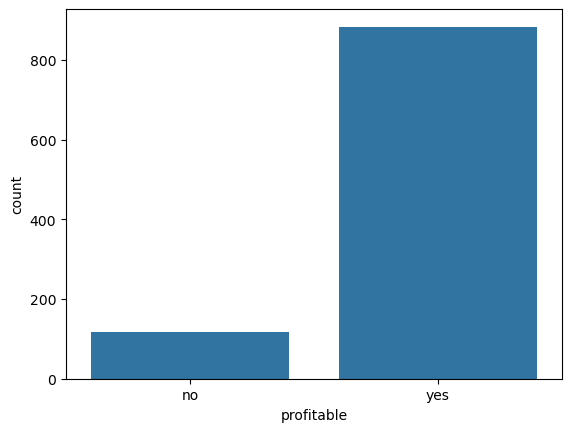

In [789]:
sns.countplot(x='profitable',data=df)

In [790]:
model=RandomForestRegressor()

print(f'for {name}:')
start=time()
model.fit(x_train_scaled,y_train)
fit_time[name]=time()-start
y_pred=model.predict(x_test_scaled)
r2Score=round(r2_score(y_pred=y_pred,y_true=y_test),2)
mse=round(mean_squared_error(y_pred=y_pred,y_true=y_test),2)
rmse=round(root_mean_squared_error(y_pred=y_pred,y_true=y_test),2)
mae=round(mean_absolute_error(y_pred=y_pred,y_true=y_test),2)
scores[name]=[r2Score,mse,mae,rmse]
print(f'r2 score {r2Score} , mse {mse} , mae {mae} , rmse {rmse}')
print('---------------------------------------------------------------------')

for XG boosting:
r2 score 0.49 , mse 368106.32 , mae 393.65 , rmse 606.72
---------------------------------------------------------------------


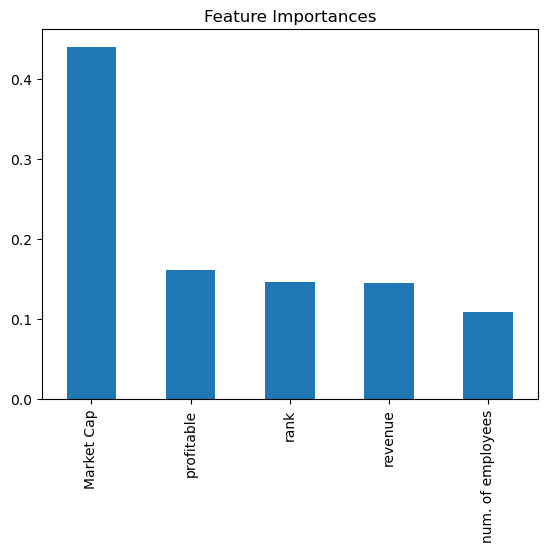

In [791]:
# After fitting your model
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
feat_imp.plot(kind='bar')
plt.title("Feature Importances")
plt.show()

In [792]:
# # Define the RandomForest model
# rf_model = XGBRFRegressor(learning_rate=0.2)

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'min_child_weight': [1, 3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3],
#     'reg_lambda': [0.1, 1, 10]
# }


# # Set up GridSearchCV
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', refit=True, n_jobs=-1)

# # Fit the grid search
# grid_search_rf.fit(x_train_scaled, y_train)

# # Print the best parameters and the best score
# print("Best parameters found: ", grid_search_rf.best_params_)
# print("Best score: ", grid_search_rf.best_score_)